<a href="https://colab.research.google.com/github/peterjheile/AML-HWK3-Q1/blob/main/main_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Machine Learning Project 4 Question 1: Rock Image Classication</h1>

<p>
    <strong>Purpose:</strong>
    <p>The purpose of this assignment is to apply several Dimensionality Reduction Techniques to help us create three Machine Learning Models that will allow us to achieve a higher accuracy than humans and/or random chance when classifying rocks, and allow us to understand how our models predict rock class compared to how humans predict rock class.
    </p>
</p>
</br>

<p>
    <strong>Methods:</strong>
    <p>Dimensionality Reduction Techniques: Principle Component Analyis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Locally Linear Embedding (LLE), and Multidemensional Scaling (MDS)
    <br><br>Machine Learning Models: K-Means, Expectation Maximization (EM), and Convolutional Neural Network (CNN)
    </p>
</p>
</br>
<p>
    <strong>Results Analysis:</strong>
    <p>To analyze our results, we will use accuracy at times to gauge overall performance of our models to see if they perform well or at least better than random chance.<br><br>We will also be using Procrustes Analyses when we are interested in finding how our models classify rocks compared to how humans classify rocks.</p>
</p>
<br>
<p>
    <strong>Group Members:</strong> Peter Heile, Akanksha Khurd, Anshika Bajpai
</p>

<p>
    <strong>Sources:</strong> https://github.com/ageron/handson-ml3, https://www.tensorflow.org/api_docs, https://keras.io/api/, https://numpy.org/doc/, https://pillow.readthedocs.io/en/stable/, chat GPT
</p>

<h1>Part 1.1: Getting Our Data</h1>

In [1]:
#Code to download the dataset into google colab
!git clone https://github.com/peterjheile/AML-HWK3-Q1.git

#local filepath to the dataset (just a folder with a bunch of images) (Run for Google Colab)
dataset_filepath = "/content/AML-HWK3-Q1/Dataset"


Cloning into 'AML-HWK3-Q1'...
remote: Enumerating objects: 13681, done.
remote: Counting objects: 100% (1730/1730), done.
remote: Compressing objects: 100% (1638/1638), done.
remote: Total 13681 (delta 93), reused 1561 (delta 90), pack-reused 11951 (from 1)
Receiving objects: 100% (13681/13681), 169.19 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (837/837), done.


In [ ]:
# #local filepath to the dataset (just a folder with a bunch of images) (Run for VS CODE)
# dataset_filepath = "Dataset"

In [ ]:
#First, we want to get all of our data instances and classes to use. I will use PIL library to load the images because I have used it before and it is simple.
import numpy as np
from PIL import Image
import os

#Create container for dataset features (pixels) and dataset labels (rock type)
dataset_features = []
dataset_labels = []

#iteratee through each image and add each image isntance into an array (and convert the result to a numpy array) for features
#Also get the Rocktype and add it to the labels container
for image_name in sorted(os.listdir(dataset_filepath)):
    image_filepath = os.path.join(dataset_filepath, image_name)
    if image_filepath[-3:] == "jpg":

        #label (rocktype) and features (pixels). the First charachter is the image class
        image_features = np.array(Image.open(image_filepath).convert('L'))
        image_label = image_name[0].upper()

        #add to respective container
        dataset_features.append(image_features)
        dataset_labels.append(image_label)

#now convert each container to numpy arrays (this will help later on when we are doiong a lot data manipulation and calculations)
dataset_features = np.array(dataset_features)
dataset_labels = np.array(dataset_labels)

rock_type_integer = []
for rock_type in dataset_labels:
    if rock_type == "I":
        rock_type_integer.append(0)
    elif rock_type == "M":
        rock_type_integer.append(1)
    elif rock_type == "S":
        rock_type_integer.append(2)

In [ ]:
#Now I want to do a little bit of visualization just so we understand the dataset we are working at

#First I want to see if all the images are the same size. If they are not, I am goiong to resize them all. Image check will be zero if all imagea re the same size
image_size = dataset_features[0].shape
image_check = sum([(image.shape != image_size) for image in dataset_features])

#print results
print(f"All Images Have Same Size: {image_check == 0}")

print(f"\nTotal Dataset Instances: {len(dataset_labels)}")
print(f"Individual Image Shape: {image_size}")

#Yay! They are all the same shape :)

All Images Have Same Size: True

Total Dataset Instances: 360
Individual Image Shape: (800, 800)


Total Classes: 3


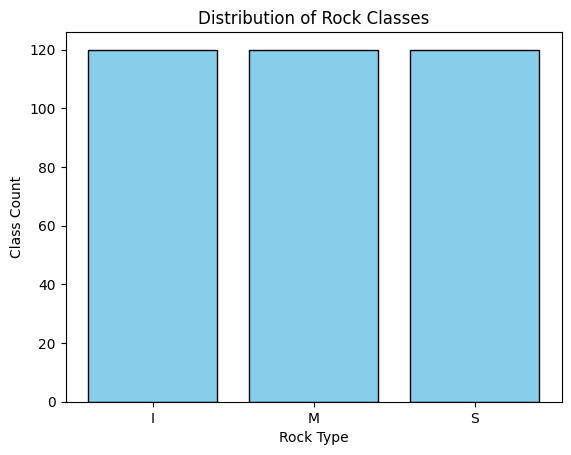

In [ ]:
#And now also just a little information about our labels

#First I want to see how many labels we have (should be 3 classes), and I also want to see how amyn isntances we have of each class and plot its histogram.
#This could be usefew for if we accidentally train or test on disporportionate class instances and just to generally know
# Create a histogram of the labels
import matplotlib.pyplot as plt

classes, classes_counts = np.unique(dataset_labels, return_counts=True)

#Plot the histogram
plt.bar(classes, classes_counts, color='skyblue', edgecolor='black')

plt.xlabel('Rock Type')
plt.ylabel('Class Count')
plt.title('Distribution of Rock Classes')


print(f"Total Classes: {len(classes)}")

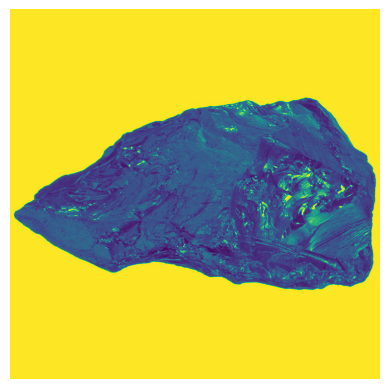

In [ ]:
#Just some auxillary code to visualize the images from the dataset_features

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

display_image(dataset_features[140])

In [ ]:
#For using PCA or any other algorithm, we would need the data to be in n*m shape where n is the number of instances
# i.e. 360 in this case, and m is the number of features which is 1920000 (Damnnn!) in this case.
# Following code converts our data into these required dimensions:

imageog = np.array([rock_pixels.flatten() for rock_pixels in dataset_features])
print(imageog.shape)

(360, 640000)


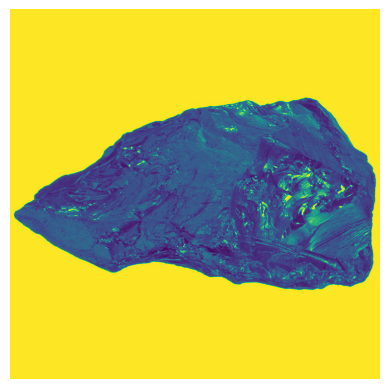

In [ ]:
#Auxillary function: Just checking if we can retrive the iamge from this reshaped data
def reshape_and_display(flat_image_array):
    image = flat_image_array.reshape(800, 800)
    display_image(image)

reshape_and_display(imageog[140])

<h1>Part 1.2: PCA and 90% Variance</h1>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(imageog)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print(d)

158


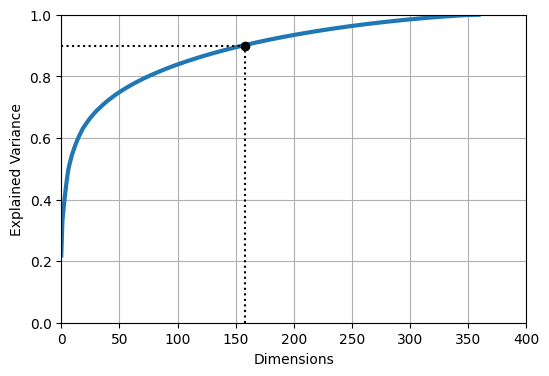

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.grid(True)

<h1>Part 1 Analysis:</h1>
<p><strong>Our Dataset: </strong>
Our Dataset consists of 360 instances of rock images. These images are classified as one of three classes - Igneous (I), Metamorphic (M), or Sedimentary (S). There is an exectly equal porportion of each class in the dataset. After we retreive this data, we have 360 instances with 640000 features each.
</p>
<br>
<p><strong> PCA Results: </strong>  We plot the explained variance for each principle component. To minimize and our principle components and still maintain 90% varience, we have to keep <strong>158</strong> components.
</p>

<h1>Part 2: Plotting PCA reconstructions</h1>

In [ ]:
#90% variance
pca = PCA(n_components=158)
image_downsized = pca.fit_transform(imageog)
print(image_downsized.shape)

(360, 158)


In [ ]:
image_recovered = pca.inverse_transform(image_downsized)
print(image_recovered.shape)

(360, 640000)


Printing image indices:  [141 309 336 132 247  60 142  61 193 226]


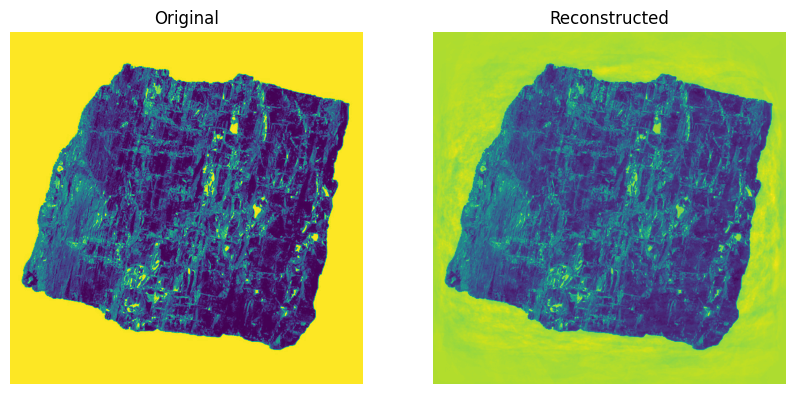

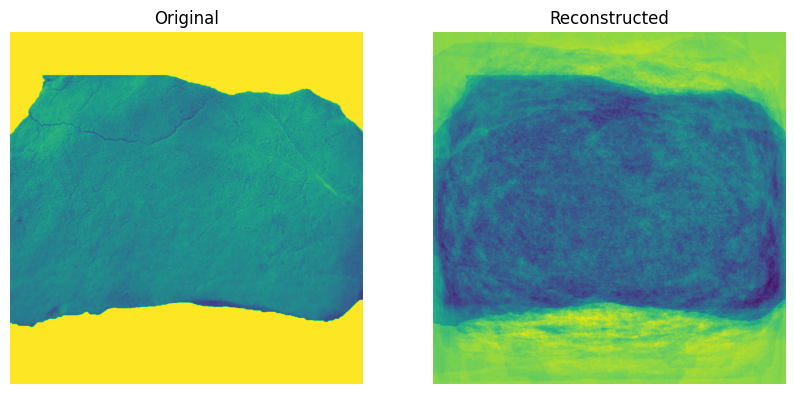

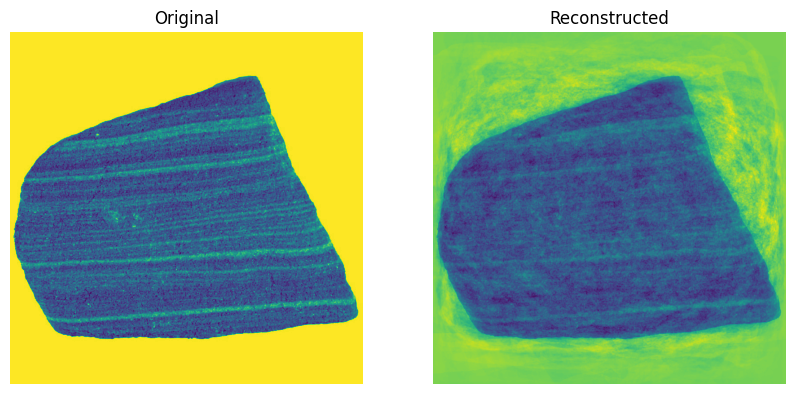

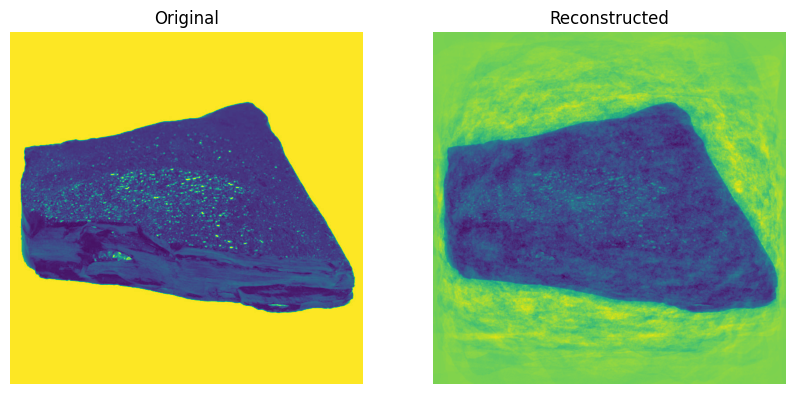

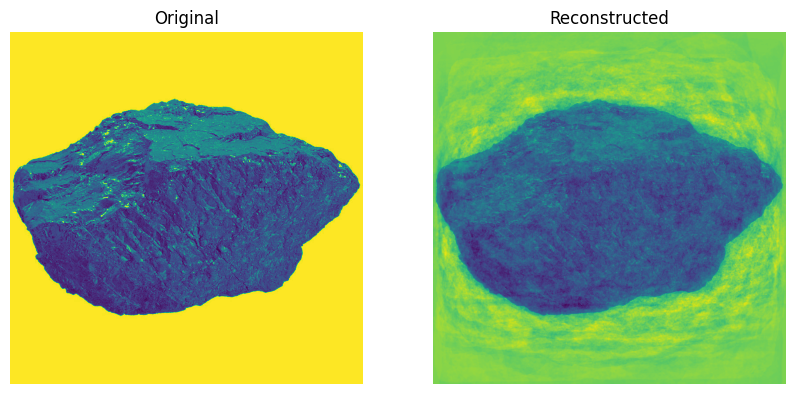

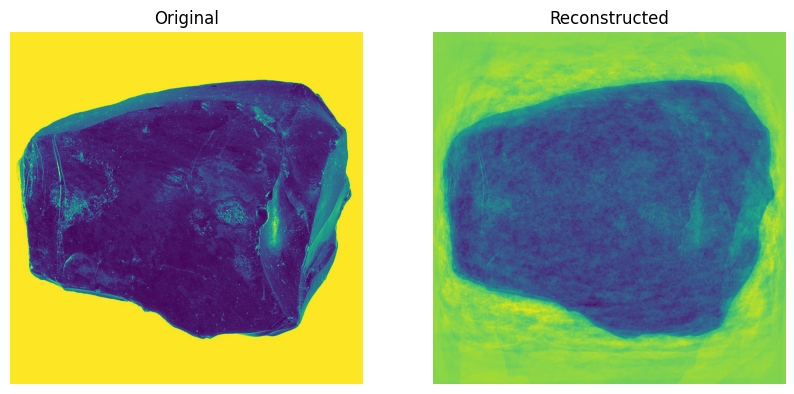

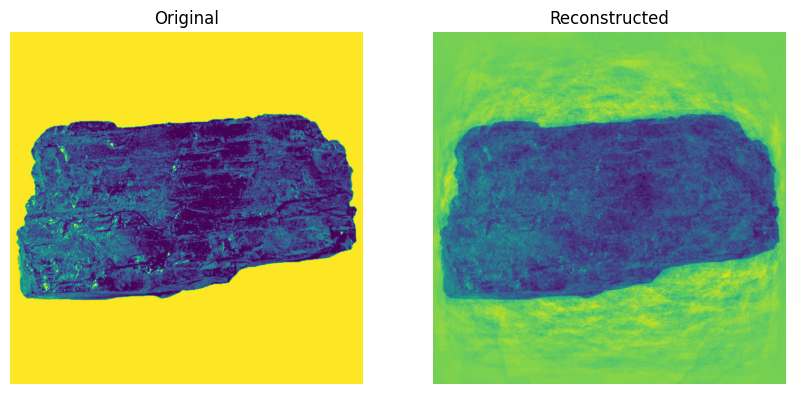

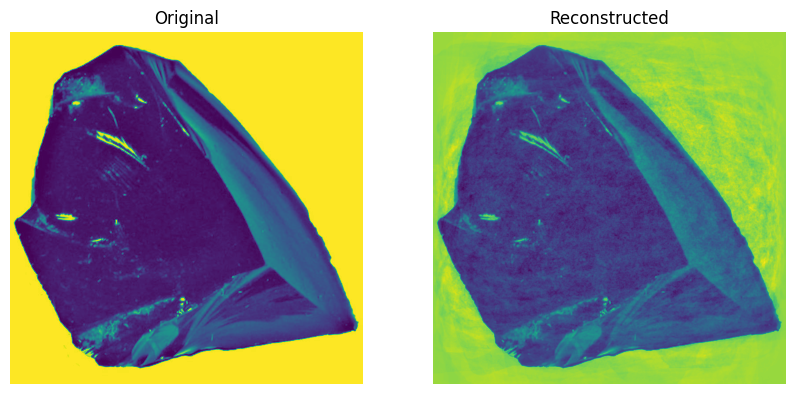

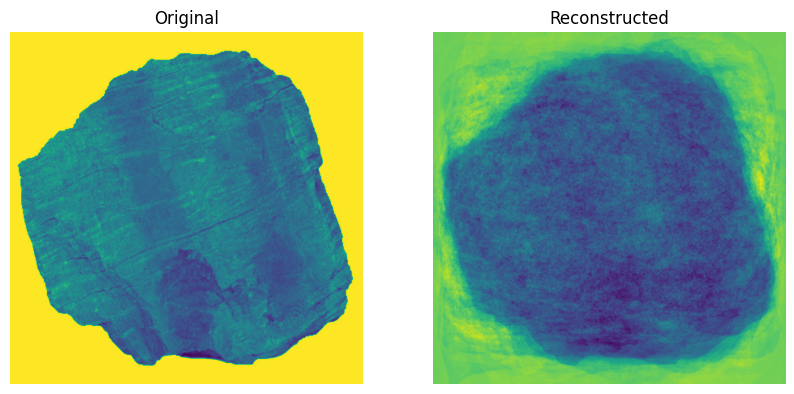

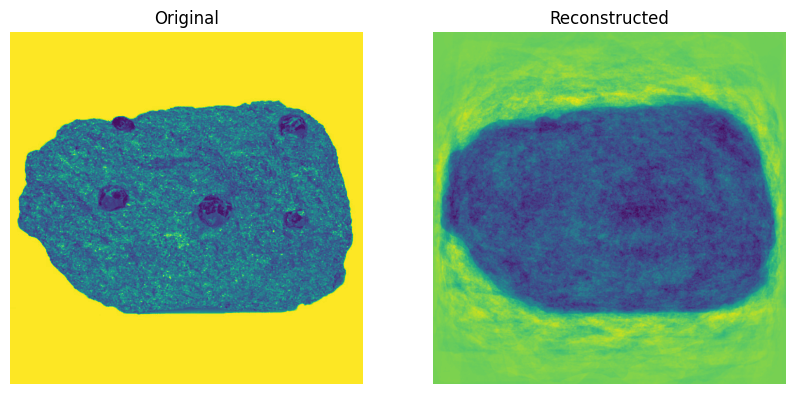

In [ ]:
choice_image_index = np.random.choice([i for i in range(360)],10,replace=False)
print("Printing image indices: ", choice_image_index)

for image_index in choice_image_index:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    image = imageog[image_index].reshape(800, 800)
    plt.imshow(image)
    plt.title("Original")
    plt.axis('off')
    plt.subplot(122)
    image = image_recovered[image_index].reshape(800, 800)
    plt.imshow(image)
    plt.title("Reconstructed")
    plt.axis('off')
    plt.show()

<h1>Part 2 Analysis: </h1>
<p><strong>Comparing Reconstruction: </strong>
We perform PCA on every image and then reoctruct them and show 10 of these rocks versus their reconstruction. The reconstructed images look very similar to the original images (one could say they look 90% similar ha!). Just based on me (a human) seeing this, the main attribute I feel the rocks lost was some depth/texture. How large of a part this plays for our models and humans, it is hard to say though until further analysis.
<p>

<h1>Part 3.1: PCA Variance and 2 Principle Components</h1>

In [ ]:
#Get first 2 PCs
pca2 = PCA(n_components=2)
image_downsized2 = pca2.fit_transform(imageog)
image_recovered2 = pca2.inverse_transform(image_downsized2)

In [ ]:
#NOTE: Q3 part 1 here
#PCA allows to see the explained variance
print("Variance explained by first two components:",pca.explained_variance_ratio_[0],"and",pca.explained_variance_ratio_[1])

print("Sum of the variance explained by 2 dimensions: ",pca2.explained_variance_ratio_.sum())

Variance explained by first two components: 0.21799204228916436 and 0.11386590540803508
Sum of the variance explained by 2 dimensions:  0.33185794769719973


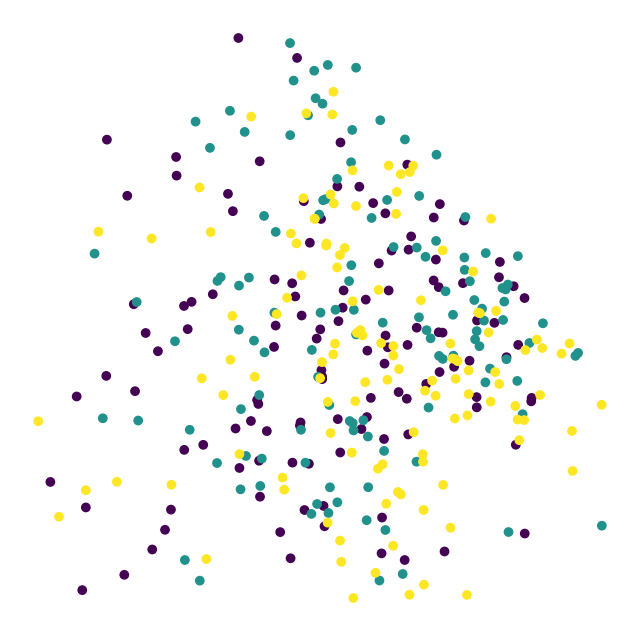

In [ ]:
#scatter plot for each image in new space (2 PCs)
#each color denotes a class
plt.figure(figsize=(8,8))
plt.scatter(image_downsized2[:,0],image_downsized2[:,1], c = rock_type_integer)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
#original code from our Book
def plot_digits(X, y, min_distance=0.1, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 3)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 3),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(800, 800)
                imagebox = AnnotationBbox(OffsetImage(image, zoom=0.05),
                                          image_coord)
                ax.add_artist(imagebox)

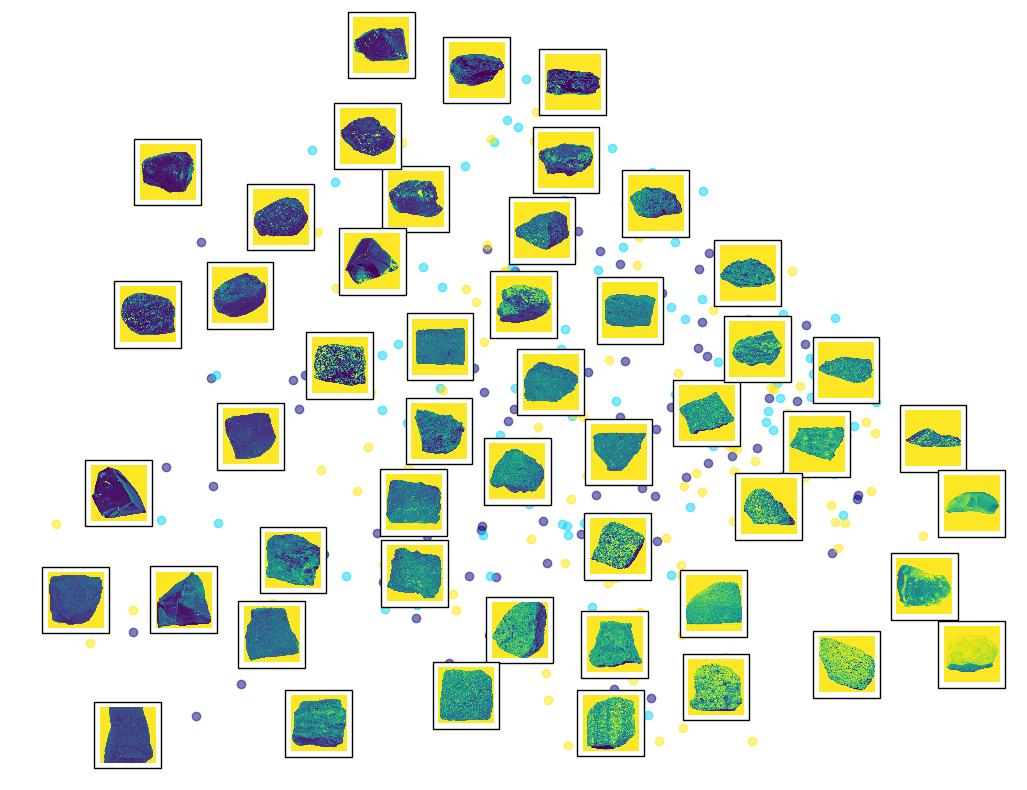

In [ ]:
#plot each image with 2 principle components form PCA and add the original rock images overtop for some of the points
plot_digits(X = image_downsized2, y = rock_type_integer, images = imageog)

<h1>Part 3.2: t-SNE and 2 Principle Components</h1>

In [ ]:
from sklearn.manifold import TSNE

#make the transformer
tsne = TSNE(n_components=2, init = "random", random_state=42)

#reduce the image dimensions to 2 and store, and then convert back to original size and store
images_downsized_tsne = tsne.fit_transform(imageog)

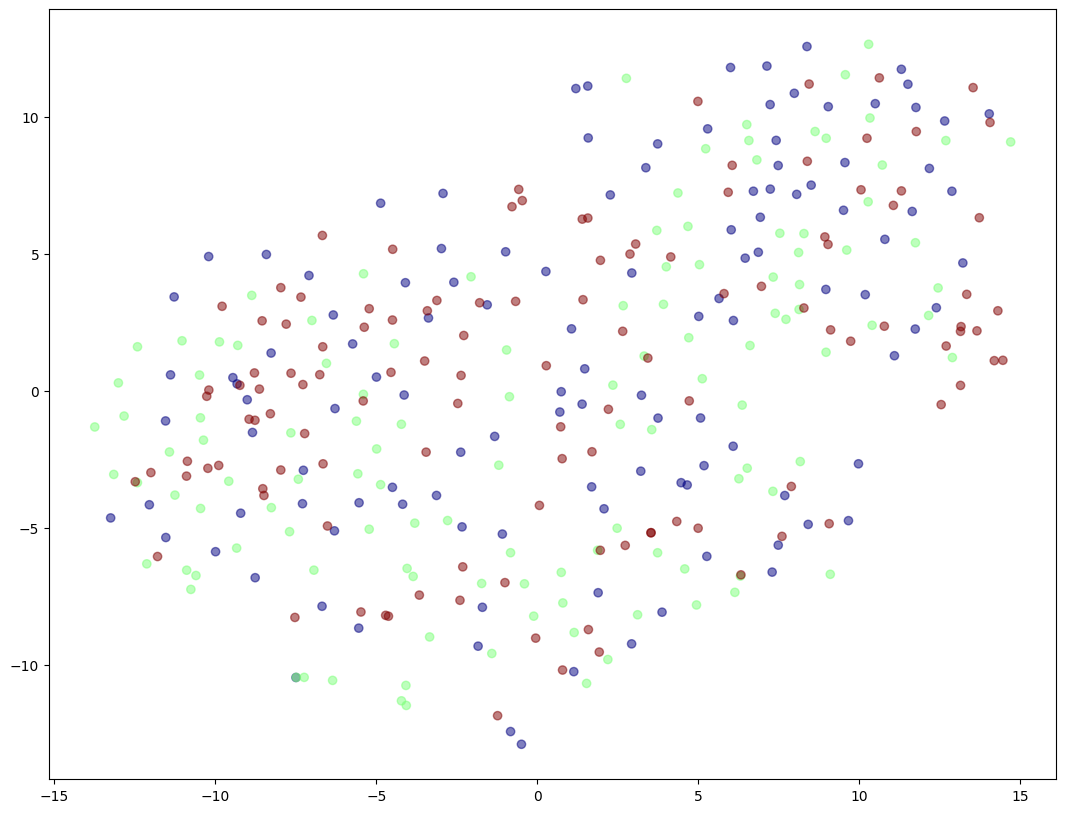

In [ ]:
#Plot each image's PC's without rock overlay
#plot the resulting first two componenets using tsne to see the local Variance for all rocks
label_colors = {'I': 0, 'M': 100, 'S': 200}
all_instance_colors = [label_colors[label] for label in dataset_labels]
plt.figure(figsize=(13, 10))
plt.scatter(images_downsized_tsne[:, 0], images_downsized_tsne[:, 1], c=all_instance_colors, cmap="jet", alpha=0.5)
plt.show()

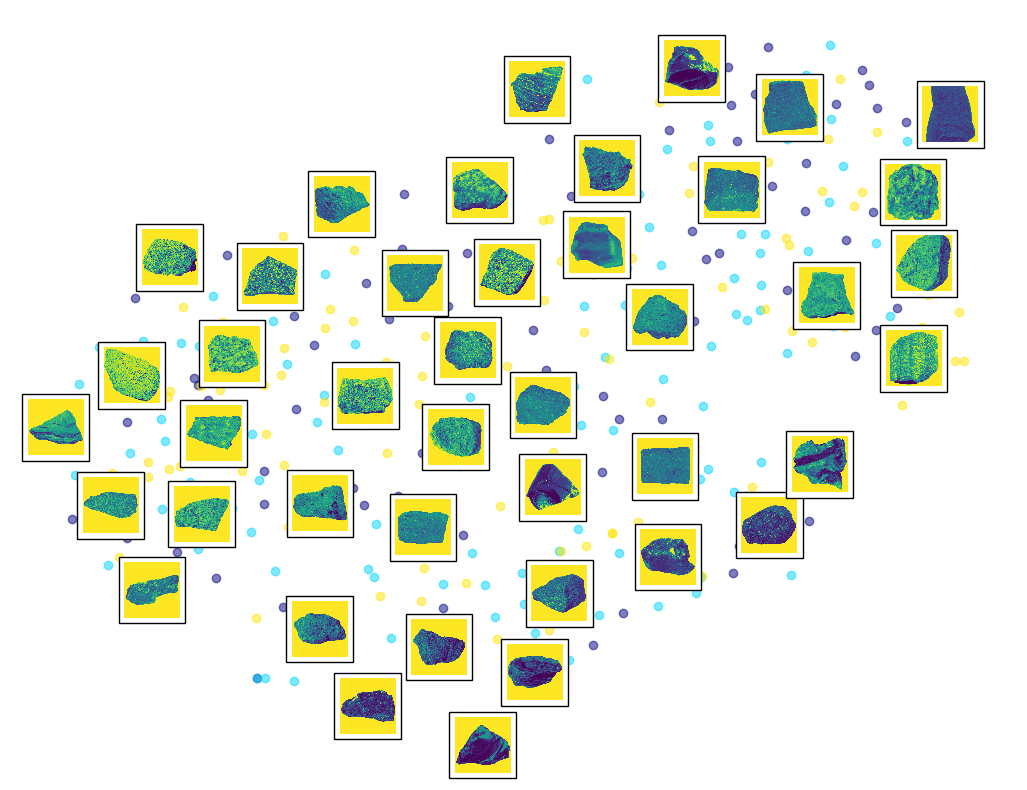

In [ ]:
#plot each image with 2 principle components from tsne with original images overtop
plot_digits(X = images_downsized_tsne, y = rock_type_integer, images = imageog)

<h1>Part 3.3: LLE and 2 Principle Components</h1>

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
#Same, now with LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
images_lle_reduced = lle.fit_transform(imageog)

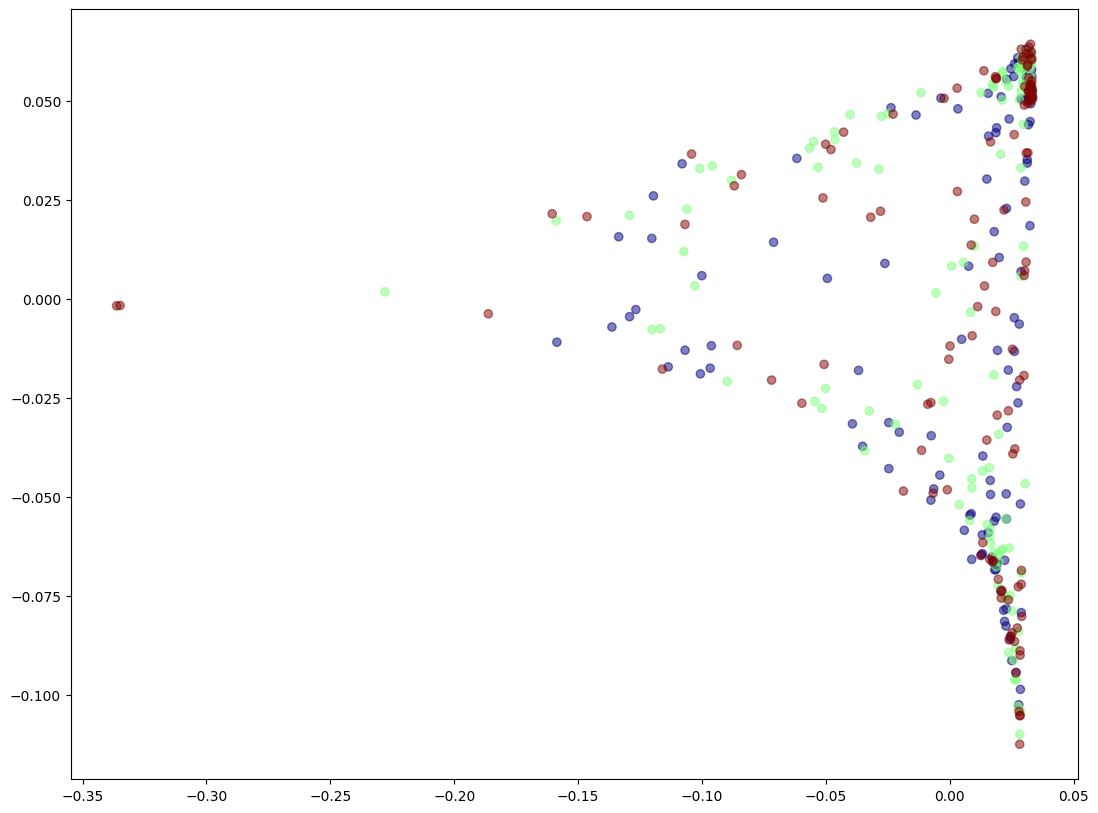

In [ ]:
#first plot without the images for LLE
label_colors = {'I': 0, 'M': 100, 'S': 200}
all_instance_colors = [label_colors[label] for label in dataset_labels]
plt.figure(figsize=(13, 10))
plt.scatter(images_lle_reduced[:, 0], images_lle_reduced[:, 1], c=all_instance_colors, cmap="jet", alpha=0.5)
plt.show()

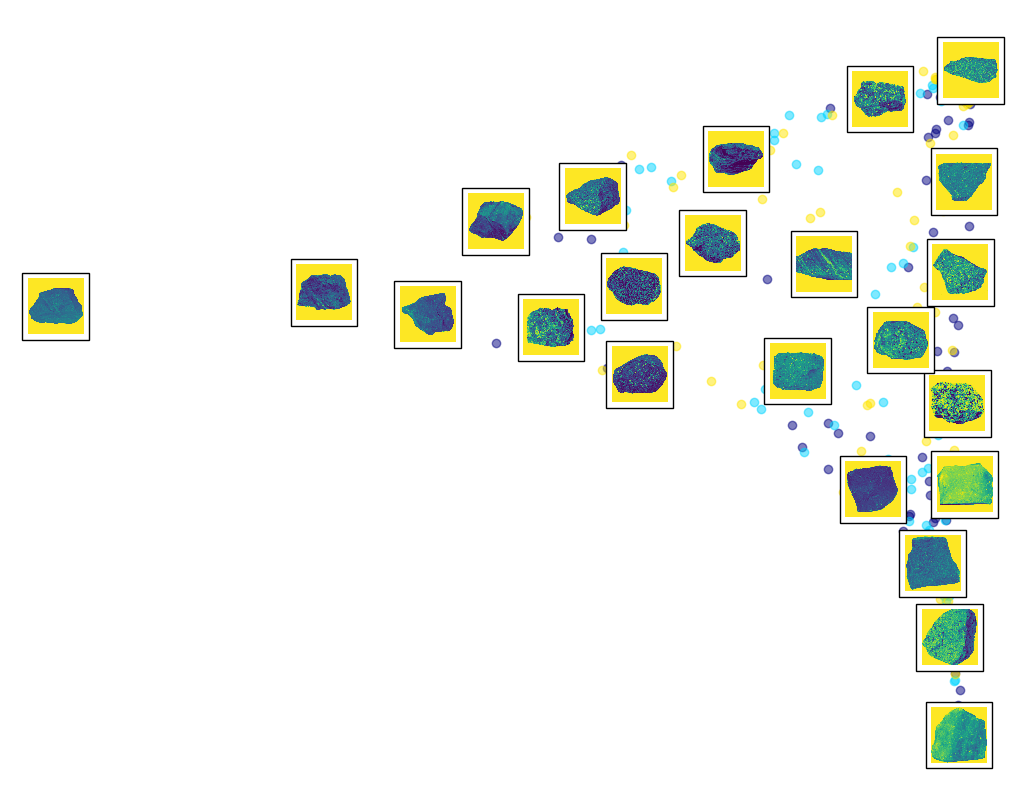

In [ ]:
plot_digits(X = images_lle_reduced, y = rock_type_integer, images = imageog)
plt.show()

<h1>Part 3.4: MDS and 2 Principle Components</h1>

In [ ]:
#implementation of Multi Dimensional Scaling (MDS)
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(imageog)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


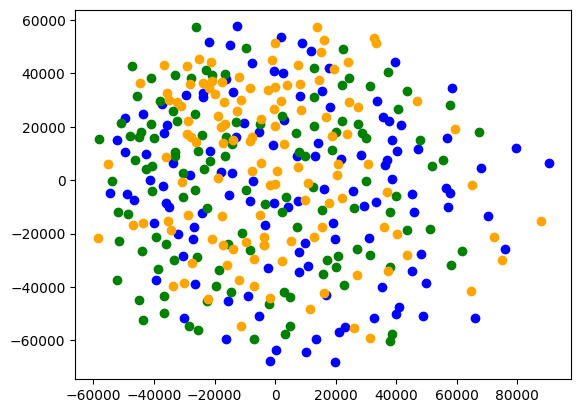

In [ ]:
fig=plt.figure()
ax1 = fig.add_subplot(111)

#loading the indexes in individual arrays for plotting a scatter plot based on their respective labels
index_i=[]
index_m=[]
index_s=[]
for i in range(len(dataset_labels)):
  if dataset_labels[i] =='I':
    index_i.append(i)
  if dataset_labels[i]=='M':
    index_m.append(i)
  if dataset_labels[i]=='S':
    index_s.append(i)
print(index_i)

#Below is the plot for reduced images using MDS
plt.scatter(X_reduced_mds[index_i,0], X_reduced_mds[index_i,1],c='b',label='I')
plt.scatter(X_reduced_mds[index_m,0], X_reduced_mds[index_m,1],c='g',label='M')
plt.scatter(X_reduced_mds[index_s,0], X_reduced_mds[index_s,1],c='orange',label='S')

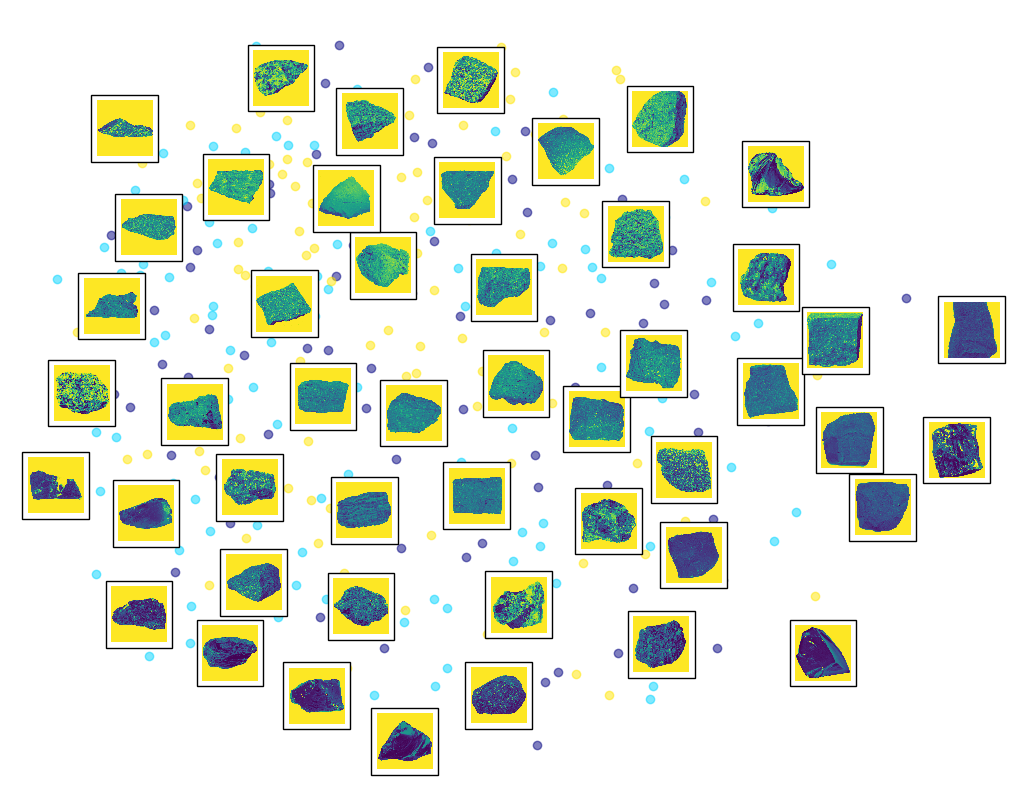

In [ ]:
#Scatter plot with images
plot_digits(X = X_reduced_mds, y = rock_type_integer, images = imageog)
plt.show()

<h1>Part 3 Analysis: </h1>
<p><strong>2 principle components:</strong>
For each of PCA, t-SNE, LLE, and MDS we got the first to components and plotted them first with just the colors. By looking at the explained variance for PCA and the scattering of these colors, it is obvious that two components do not capture enough variance (whether global, local, etc) to make meaningful patterns to differentiate classes. When we overlay the rocks, we can see that at times there may be slightly more of one class in a given 2d area; however this partly has to do with our method of plotting the images. For all purposes, it is hard to see any patterns with two components for any of our techniques.
</p>

<h1>Part 4.1: PCA comparison with human dataset using Procrustes Analysis</h1>


In [46]:
#Loading the human data for comparing all the models
import pandas as pd

human_data = np.array(pd.read_csv("/content/AML-HWK3-Q1/Dataset/mds_360.txt", sep='\s+', header=None)) #For Google Colab
# human_data = np.array(pd.read_csv("Dataset/mds_360.txt", sep='\s+', header=None)) # For VS CODE

In [ ]:
#reduce dimensions to 8 using PCA
pca8 = PCA(n_components=8)
pca8_images = pca8.fit_transform(imageog)

In [ ]:
#now perform procrustes analysis and report the disparity
from scipy.spatial import procrustes
pca_mtx1, pca_mtx2, pca_disparity = procrustes(human_data, pca8_images)
print("Disparity with MDS: ", pca_disparity)

#NOTE: A lower disparity means that they are more similar.

Disparity with MDS:  0.8696681500227913


<h1>Part 4.2: MDS comparison with human dataset using Procrustes Analysis</h1>

In [ ]:
from sklearn.manifold import MDS
#use MDS to get first 8 components
mds2 = MDS(n_components=8, normalized_stress=False, random_state=42)
mds_data = mds2.fit_transform(imageog)

In the below function:

mtx1:
A standardized version of data1.

mtx2:
The orientation of data2 that best fits data1.

disparity:
m^2

In [ ]:
#now perform procrustes analysis and report the disparity
mds_mtx1, mds_mtx2, mds_disparity = procrustes(human_data, mds_data)
print("Disparity with MDS: ", mds_disparity)

Disparity with MDS:  0.887540820632027


<h1>Part 4.3: LLE comparison with human dataset using Procrustes Analysis</h1>

In [ ]:
rocks_lle8 = LocallyLinearEmbedding(n_components=8, random_state=42)
reduced_lle8 = rocks_lle8.fit_transform(imageog)

In [ ]:
from scipy.spatial import procrustes
lle_mtx1, lle_mtx2, lle_disparity = procrustes(human_data, reduced_lle8)
print("Disparity with LLE: ", lle_disparity)

Disparity with LLE:  0.9332586724510623


<h1>Part 4.4: Comparing and Viewing Correlation Coefficients</h1>

In [ ]:
#take each cooefficient and add to a pandas dataframe and print the dataframe as a chart
#There may be better ways but this was fast and convenient and looks pretty.
data = [["PCA Correlation cooefficients"] + [np.corrcoef(pca_mtx1[:,i],pca_mtx2[:,i])[0][1] for i in range(8)],
    ["MDS Correlation cooefficients"] + [np.corrcoef(mds_mtx1[:,i],mds_mtx2[:,i])[0][1] for i in range(8)],
    ["LLE Correlation cooefficients"] + [np.corrcoef(lle_mtx1[:,i],lle_mtx2[:,i])[0][1] for i in range(8)]]

coef_df = pd.DataFrame(data, columns = ['Name', "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

#now show the table
coef_df


Name       PC1       PC2       PC3       PC4  \
0  PCA Correlation cooefficients  0.831073  0.198247  0.236155  0.338331   
1  MDS Correlation cooefficients  0.830857  0.212112  0.240814  0.298229   
2  LLE Correlation cooefficients  0.723959  0.230086  0.228543  0.094190   

        PC5       PC6       PC7       PC8  
0  0.134890  0.259320  0.216665  0.067713  
1  0.171069  0.253225  0.213761  0.041468  
2  0.112361  0.222063  0.292400  0.071560

<h1>Part 4 Analysis:</h1>
<p><strong>Disparity:</strong> We used procrustes analysis on PCA, MDS, and LLE to find the difference between the first 8 components from our dimensionality reduction techniques to the 8 components humans use to classify rocks. Below are the results of Procrustes.<br><br>PCA Disparity: .869<br>MDS Disparity: .887<br>LLE Disparity: .933<br><br>
By looking at this disparity, we can tell that our 8 found components for each of our techniques, do not even roughly model the components humans use. This is assuming that a disparity of .0-.3 is close resemblance, and .3 - 1 is poor resemblance.
</p>

<h1>Part 5: K-Means Modeling</h1>

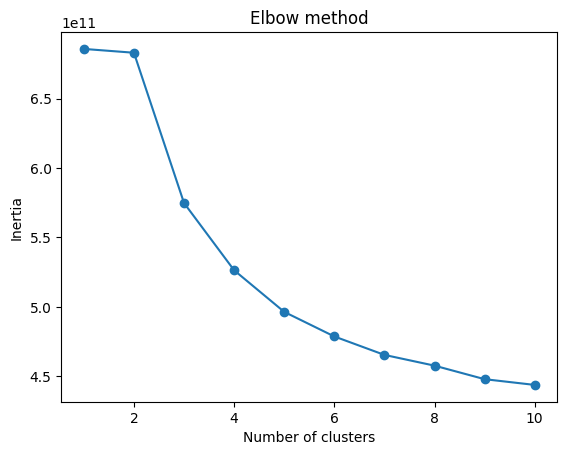

In [ ]:
#Here we are implementing the Kmeans clustering algorithm on the image_downsized dataset which has atleast 90% variance reserved.
from sklearn.cluster import KMeans

inertias = []
#Finding out the best number of clusters using Elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(image_downsized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Using elbow method we can say that 3 is the best number of clusters, as there is no significant difference between the inertia's (3 to 4, 4 to 5,... so on), but between 1 to 3 the inertia changes from 7+ to 5.75 (approx)

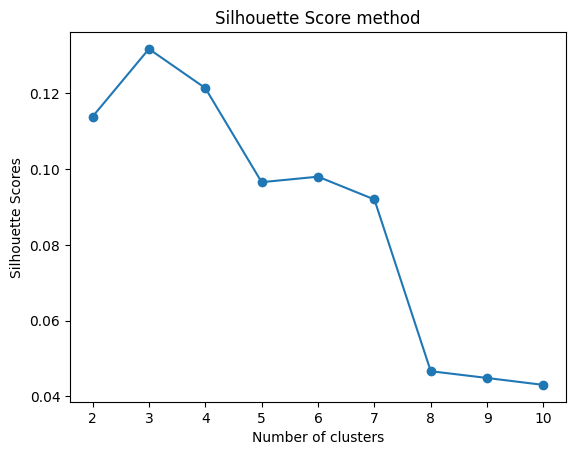

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Finding out the best number of clusters using silhouette score method
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(image_downsized)
    silhouette_scores.append(silhouette_score(image_downsized,kmeans.labels_))

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('Silhouette Score method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

The above graph gives the best number of clusters (which we already know from the labelled dataset, i.e. 3). The graph shows 3 as the best also.

In [ ]:
#Part b
#Implementing the Kmeans algorithm with number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(image_downsized)

#printing the labels for first 5 rocks
y_pred[:5]

array([1, 1, 2, 1, 2], dtype=int32)

In [ ]:
#printing the inertia and the score
print("Inertia: ",kmeans.inertia_)
print("Score (higher is better): ",kmeans.score(image_downsized))

Inertia:  574813786447.6655
Score (higher is better):  -574813786447.6655


Here the clustering method which is used is hard clustering, we are categorizing the rocks into each of the labels. I,S,M.

Problem of preserving the label identities:
Because we don't know whether the cluster 0(or cluster 1 or 2) belongs to label I, S, or M, we can't calculate the accuracy of the k means algorithm directly. In order to find the best labels fit from the k means cluster algorithm, we will have to use hungarian algorithm for optimal mapping whcih will perform all the permutation combinations and will fit the best cluster labels, which are most similar to the true labels. Below is its implementation to calculate the accuracy score.

In [ ]:
#Using Hungarian Algorithm for Optimal Mapping
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(rock_type_integer, y_pred)

row_ind, col_ind = linear_sum_assignment(-confusion_matrix)

mapped_predictions = np.zeros_like(y_pred)
for pred_label, true_label in zip(col_ind, row_ind):
    mapped_predictions[y_pred == pred_label] = true_label

accuracy = accuracy_score(rock_type_integer, mapped_predictions)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

Clustering Accuracy: 39.17%


<h1>Part 5 Analysis:</h1>
<p><strong>Results: </strong>The final accuracy was found to be 39.17%. By using the elbow and sillhouette methods, we determined that the best cluster count was 3. This low accuracy is as we expected from looking at our charts where even with 90% variance, there were no clear dicision boundaries or groupings.

<h1>Part 6: Expectation Maximization Modeling</h1>

In [ ]:
from sklearn.mixture import GaussianMixture

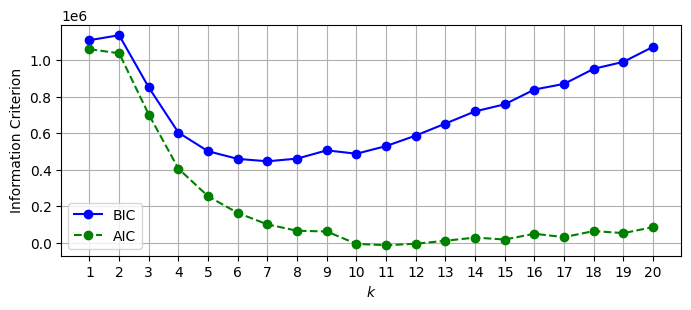

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(image_downsized)
             for k in range(1, 21)]
bics = [model.bic(image_downsized) for model in gms_per_k]
aics = [model.aic(image_downsized) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 21), bics, "bo-", label="BIC")
plt.plot(range(1, 21), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.xticks(range(1, 21),range(1, 21))
plt.legend()
plt.grid()
plt.show()

In [ ]:
gm3 = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm3.fit(image_downsized)
predictions = gm3.predict(image_downsized)

In [ ]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score


confusion_matrix = np.zeros((3, 3))
for true, pred in zip(rock_type_integer, predictions):
    confusion_matrix[true, pred] += 1

row_ind, col_ind = linear_sum_assignment(-confusion_matrix)

mapped_predictions = np.zeros_like(predictions)
for pred_label, true_label in zip(col_ind, row_ind):
    mapped_predictions[predictions == pred_label] = true_label

accuracy = accuracy_score(rock_type_integer, mapped_predictions)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

Clustering Accuracy: 40.28%


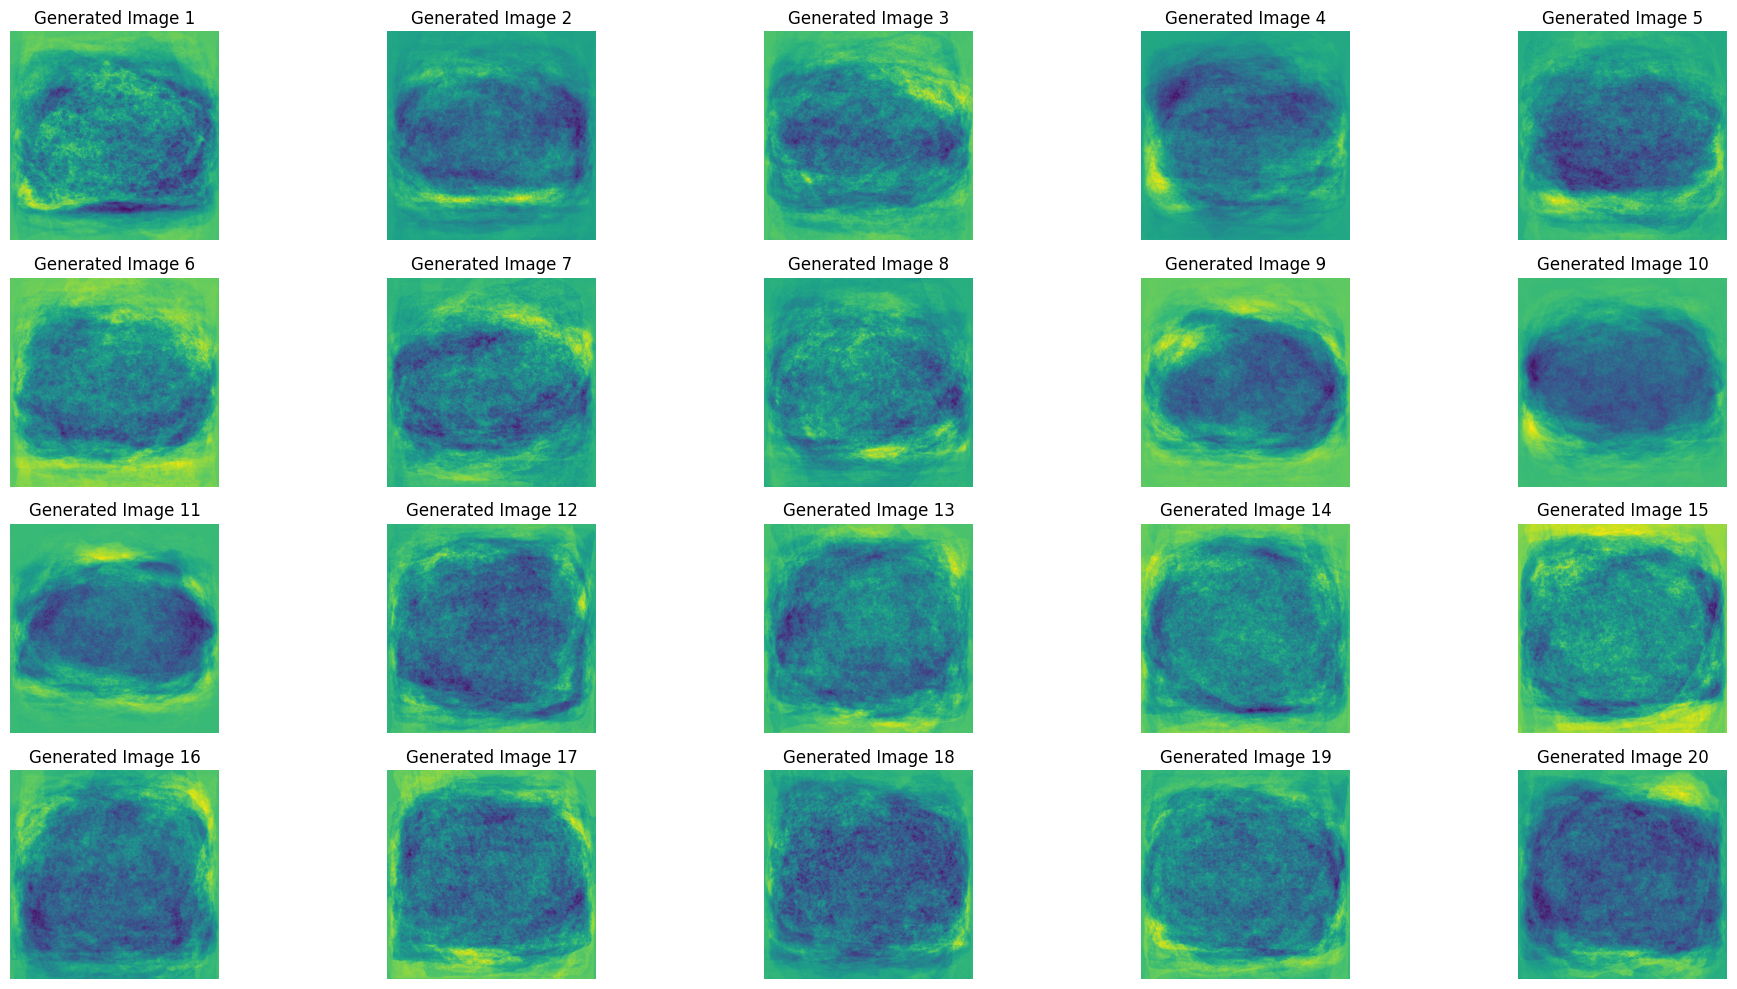

In [ ]:

n_samples = 20
generated_samples, _ = gm3.sample(n_samples=n_samples)

reconstructed_images = pca.inverse_transform(generated_samples)
reconstructed_images = reconstructed_images.reshape((n_samples, 800, 800))

plt.figure(figsize=(20, 10))
for i in range(n_samples):
    plt.subplot(4, 5, i + 1)
    plt.imshow(reconstructed_images[i])
    plt.axis('off')
    plt.title(f"Generated Image {i+1}")

plt.tight_layout()
plt.show()


<h1>Part 6 Analysis:</h1>
<p><strong>Results</strong>Much like the prior K-Means model, we recieved and expected low accuracy. Our accuracy from our EM was 40% after training. Using BIC and AIC however, this time we determined that the number of clusters was more so around 9 or 10 as apposed to the K-Means that found 3. That being said, we have to train the model using 3 clusters to find our accuracy because our labels are three clusters.</p>

<h1>Part 7.1: Neural Network Datasets</h1>

In [2]:
#Because of the need of getting a new dataset for validation, I made a new dataset folder for better modularity and
#used it (even though it has much of the same data as the original dataset folder)

#filepath to this new dataset folder
dataset2_filepath = "/content/AML-HWK3-Q1/Dataset2"

In [3]:
#NOTE: THis is just for the images, the human datasets is easyso we just
#get it as we need it
import os
import numpy as np
from PIL import Image

#For my CNN Later on I use categorical cross entorpy as my error function, so
#I will have to convert all of my Letter labels from the images into One hot vectors.
conversion = {'I': [1, 0, 0], 'M': [0, 1, 0], 'S': [0, 0, 1]}

#This is used for if I want to replot a flattened image
#NOTE: It assumes that the dimension added are correct to convert to
def reshape_and_display(flat_image_array, dimensions):
    image_pixels = flat_image_array.reshape(dimensions[0], dimensions[1], dimensions[2])
    image = Image.fromarray(image_pixels.astype('uint8'))
    image.show()

#This gets the dataset at a specific folder path
#NOTE: It converts all of the images to the same standard size and as black and white
#This is neccessary otherwise it takes way too long to train and hurts my brain waiting so long
def get_dataset(dataset_filepath, name, target_image_size):
    #store all the dataset features and labels
    dataset_features = []
    dataset_labels = []

    for image_name in os.listdir(dataset_filepath):
        #join each image to the filepath
        image_filepath = os.path.join(dataset_filepath, image_name)

        #label (rocktype) and features (pixels). the First charachter is the image class
        image_features = np.array(Image.open(image_filepath).convert("L").resize(target_image_size))
        image_features = np.expand_dims(image_features, axis=-1)
        #Now I need to make sure the one channel is included (this will be essential later)
        image_label = image_name[0].upper()

        #I want the feature values normalized between 0-1 so that the model has an easier time fitting weights
        image_features = image_features/255.0

        #add to respective container
        dataset_features.append(image_features)
        dataset_labels.append(conversion[image_label])

    #convert to numpy array for fast computing :)
    dataset_features = np.array(dataset_features)
    dataset_labels = np.array(dataset_labels)

    #Print the Data
    print("\n-----------------------------------------")
    print(f"Loaded Dataset Name: {name}")
    print(f"Dataset Features Shape: {dataset_features.shape}")
    print(f"Dataset Labels Shape: {dataset_labels.shape}")

    #return the features and labels
    return dataset_features, dataset_labels

In [4]:
# I made this just so that There is a single easy spot to update some parameters

#This is how big we want each image that we retrieve from the datasets (they all have to be converted to the same size)
set_image_sizes = (128, 128)

#This is how many epochs to run later for my CNN
set_epochs = 20

#this is batch size for my CNN
set_batch_size = 8

In [5]:
#Now I want to get the training features and labels (ONE hot encoded)
dataset_filepath, dataset_name, target_image_size = f"{dataset2_filepath}/Training", "Training Set", set_image_sizes
X_train, y_train = get_dataset(dataset_filepath, dataset_name, target_image_size)


-----------------------------------------
Loaded Dataset Name: Training Set
Dataset Features Shape: (360, 128, 128, 1)
Dataset Labels Shape: (360, 3)


In [6]:
#Get the validation set
dataset_filepath, dataset_name, target_image_size = f"{dataset2_filepath}/Validation", "Training Set", set_image_sizes
X_val, y_val = get_dataset(dataset_filepath, dataset_name, target_image_size)


-----------------------------------------
Loaded Dataset Name: Training Set
Dataset Features Shape: (120, 128, 128, 1)
Dataset Labels Shape: (120, 3)


In [7]:
#Just checking the labels to make sure they look right
print(f"Validation Labels Shape: {y_val.shape}")
print(f"Training Labels Shape: {y_train.shape}")

Validation Labels Shape: (120, 3)
Training Labels Shape: (360, 3)


<h1>Part 7.2: CNN Creation</h1>

In [8]:
#Next I want to make sure I can use a gpu for this to make it faster
#Check if there is a gpu to use
import tensorflow as tf
print("TensorFlow GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
#Now I need to make a Deep model. In my experience, CNNS have always performed better for image classification, so I will be yusing one
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input


#Here I want to define a bunch of layers (up to my discretion so I will just choose)
#NOTE: I will not be fine tuning the parameters. I did try a few configurations though and just
#decided on this from some opf the few I made
model = Sequential([
    Input(shape=(set_image_sizes[0], set_image_sizes[1], 1)),
    #This just uses a kernal to convolve the image, finding potential features (like lines and such)
    #Then reduce thje size because so many new features are made
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    #Now to use Dense layers, it need to be a 1d vector
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(8, activation='relu', name = "second_last_layer"),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model Compiled Successfully")

Model Compiled Successfully


In [30]:
import time
import random

#I used this before I ran out of GPU time to see how much of the GPU I was using
#!nvidia-smi

#I also set the seeds. This will hopefully make my results reproducible
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#Also it turns out I hvae to save each epoch so that way I can get the best model weights
#It will be around epoch 7 (i am doing thsi retroactively so I know)
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='checkpoints/model_epoch_{epoch:02d}.keras',
    save_weights_only=False,  # Saves the entire model (including architecture, optimizer state, weights, and biases)
    save_freq='epoch',
    verbose=1,
)

#Timer that I will use to see how long it takes to train
start_time = time.time()

#Now train the model with 20 epochs (which will be hopefully enough to show a good graph)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=set_batch_size, callbacks=[checkpoint_callback], )

#show how long it ended up taking it train
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/20
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3314 - loss: 1.1522
Epoch 1: saving model to checkpoints/model_epoch_01.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3327 - loss: 1.1508 - val_accuracy: 0.4000 - val_loss: 1.0929
Epoch 2/20
36/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4100 - loss: 1.0787
Epoch 2: saving model to checkpoints/model_epoch_02.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4083 - loss: 1.0780 - val_accuracy: 0.4500 - val_loss: 1.0847
Epoch 3/20
39/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4797 - loss: 1.0313
Epoch 3: saving model to checkpoints/model_epoch_03.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4819 - loss: 1.0261 - val_accuracy: 0.3750 - val_loss: 1.0938
Epoch 4/20
38/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5561 - loss: 0.9493
Epoch 4: saving model to checkpoints/model_epoch_04.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5658 - loss: 0.9371 - val_accu

I don't recommend running any of this unless you have a a GPU.

In [31]:
#Here is the training time again, just easier to see (and I didnt want to retrain the model again with no gpu)
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 16.15 seconds


Text(0.5, 1.0, 'Loss')

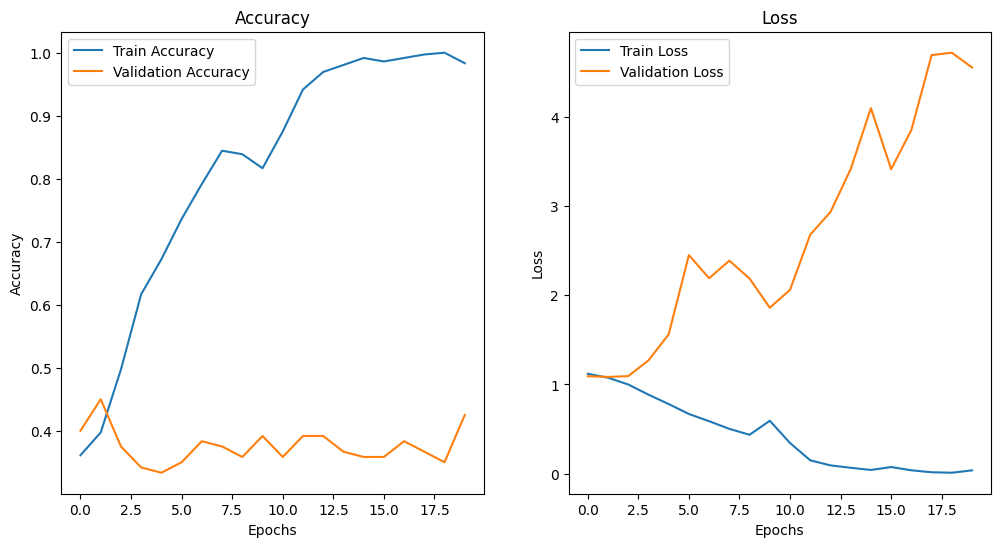

In [32]:
#Now I want to plot both the accuracy measures and loss measures of the trained model
import matplotlib.pyplot as plt

#Create a plot for ym graphs
plt.figure(figsize=(12, 6))

#Plot the accuracies
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

#plot the losses
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

In [33]:
#Now first I want to show the number of parameters in total in the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_last_layer (Dense)            │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,100,395 (42.34 MB)

 Trainable params: 3,700,131 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,400,264 (28.23 MB)

In [34]:
#and now I want to find the number of biases in the model
total_biases = 0

#just add together the biases on each layer
for layer in model.layers:
    if hasattr(layer, 'bias') and layer.bias is not None:
        total_biases += np.prod(layer.bias.shape)

print(f"Total bias parameters: {total_biases}")

Total bias parameters: 251


In [41]:
#By looking at the training and validation epoch split, I choose
#this epoch as when I want the model to stop training. Before it appears to overfit the training data
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
model_epoch_2 = load_model('checkpoints/model_epoch_02.keras')
model_epoch_2.summary()

#I also have to use some data on it to initialize its "tensors." There is really no other purpose for this
#other than to make it so I can use this layer on a new model. It is weird, but just how tensorflow requires
model_val_output = model_epoch_2.predict(X_val)
print("Valid output of first 3 outputs:\n",model_val_output[:3])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_last_layer (Dense)            │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,100,395 (42.34 MB)

 Trainable params: 3,700,131 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,400,264 (28.23 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Valid output of first 3 outputs:
 [[0.35694003 0.31372216 0.3293378 ]
 [0.34533754 0.32143605 0.33322638]
 [0.32954064 0.33297452 0.3374849 ]]


<h1>Part 7.3: CNN vs Human Analysis</h1>

In [42]:
#Now we want to perform Compare our models 2nd to last layer (with 8 different neurons) with that
#humans.
import tensorflow as tf
from tensorflow import keras

#get the model up to the second to last layer so we can input data and see results on the layer
model_no_output_layer = keras.models.Model(
    inputs=model.inputs,
    outputs=[
        model.get_layer("second_last_layer").output
    ]
)

#Now we should have the model up to the last layer
model_no_output_layer.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_last_layer (Dense)            │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,700,104 (14.11 MB)

 Trainable params: 3,700,104 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#Now that I can get the outputs of the second to alst layer of the model, I need to predict
#I have to reshape it to fit the new input (which does nothing to the prediction, it is just how tf works)
print("Input Validation Shape", X_val.shape)
outputs = model_no_output_layer.predict(X_val)

second_last_layer_output = outputs

print("validation Output Shape:",second_last_layer_output.shape)

#NOTE: This is mainly for me seeing if everything works correcly. I will be predicting again in the
#next code blocks

Input Validation Shape (120, 128, 128, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
validation Output Shape: (120, 8)


In [49]:
#Now with these predicted values outputs for the second to alst layer,
#I want to perform procrustes analysis much like before and report the disparity
from scipy.spatial import procrustes

second_last_layer_output_train = model_no_output_layer.predict(X_train)
human_data_train = np.array(pd.read_csv("/content/AML-HWK3-Q1/Dataset2/mds_360.txt", sep='\s+', header=None))

cnn_mtx1_train, cnn_mtx2_train, cnn_disparity_train = procrustes(human_data_train, second_last_layer_output_train)
print("Disparity with MDS: ", cnn_disparity_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Disparity with MDS:  0.993487032176271


In [51]:
#Now do the same for the validation set
second_last_layer_output_val = model_no_output_layer.predict(X_val)
human_data_val = np.array(pd.read_csv("/content/AML-HWK3-Q1/Dataset2/mds_120.txt", sep='\s+', header=None))

cnn_mtx1_val, cnn_mtx2_val, cnn_disparity_val = procrustes(human_data_val, second_last_layer_output_val)
print("Disparity with MDS: ", cnn_disparity_val)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Disparity with MDS:  0.9713682233844589


In [52]:
#Now I want to find the Corelation Cooeficient and plot it in a chart much like before
data = [["CNN Train CC"] + [np.corrcoef(cnn_mtx1_train[:,i],cnn_mtx2_train[:,i])[0][1] for i in range(8)],
    ["CNN Val CC"] + [np.corrcoef(cnn_mtx1_val[:,i],cnn_mtx2_val[:,i])[0][1] for i in range(8)]]

cnn_coef_df = pd.DataFrame(data, columns = ['Name', "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

#now show the table
cnn_coef_df


Name       PC1       PC2       PC3       PC4       PC5       PC6  \
0  CNN Train CC  0.046773  0.072271  0.073287  0.064996  0.120267  0.087407   
1    CNN Val CC  0.218362  0.092726  0.212015  0.202520  0.207051  0.184022   

        PC7       PC8  
0  0.116761  0.086779  
1  0.071952  0.176928

<h1>Part 7.2 Analysis:</h1>
<p><strong>Results:</strong>
For training the model, I did basic random checking for how many layers, epochs, and batch sizes. The ending accuracy I achieved on the validation was roughly 45% after two epochs. I did not choose higher accuracies where the model was overfit after that second epoch.<br><br>This low accuracy is similar to that of the other models and is again, not unexpected. <br><br>After performing Procrustes Analysis, we again got a very high disparity denoting that the components our model use to predict class are widly different than what humans use to predict class. (Do not that our model did not used black and white images for predicting and humans did not though)
</p>